In [1]:
import pandas as pd
import mysql.connector
import os

# Single CSV file and its corresponding table name
csv_file = 'global_suicide_rate_dataset.csv'
table_name = 'suicide_data'

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sql_12345678',
    database='global_suicide_rate'
)
cursor = conn.cursor()

# Folder containing the CSV file
folder_path = 'C:/Users/dell/OneDrive/Desktop/Global_suide_rate'
file_path = os.path.join(folder_path, csv_file)

# Function to map pandas data types to SQL types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process the single CSV file
if os.path.exists(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()
    print(f"Successfully processed: {csv_file}")
else:
    print(f"File not found: {file_path}")

# Close the connection
conn.close()

Processing global_suicide_rate_dataset.csv
NaN values before replacement:
country             0
year                0
sex                 0
age                 0
suicides_no         0
population          0
suicide_per_100k    0
country-year        0
HDI for year        0
 gdp_for_year       0
gdp_per_capita      0
generation          0
dtype: int64

Successfully processed: global_suicide_rate_dataset.csv


In [ ]:
# CONNECTION WITH MYSQL WORKBENCH WITH JUPYTER

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

db = mysql.connector.connect( host = "localhost",
                             username = "root",
                             password = "Sql_12345678",
                             database = "global_suicide_rate"
                            )
cur = db.cursor()

#  TOP 10 COUNRIES WITH THE HIGHEST SUICIDE RATES GLOBALLY.

In [4]:
query = """ SELECT country, AVG(suicide_per_100k) AS avg_suicide_rate
FROM suicide_data
GROUP BY country
ORDER BY avg_suicide_rate DESC"""

cur.execute(query)

data = cur.fetchall()

data


[('Lithuania', 40.415572320686955),
 ('Sri Lanka', 35.29515142964594),
 ('Russian Federation', 34.89237662496758),
 ('Hungary', 32.76151602821004),
 ('Belarus', 31.075912612652967),
 ('Kazakhstan', 30.511282123529757),
 ('Latvia', 29.259325360731474),
 ('Slovenia', 27.827857180720283),
 ('Estonia', 27.276904721108693),
 ('Ukraine', 26.58232144133321),
 ('Republic of Korea', 25.135618347113812),
 ('Austria', 23.759764376735188),
 ('Croatia', 22.83526719389981),
 ('Finland', 22.770430997956073),
 ('Guyana', 22.186399995883306),
 ('Serbia', 22.164120290152454),
 ('France', 21.67569438309098),
 ('Japan', 21.57319887551249),
 ('Suriname', 21.31642851410877),
 ('Belgium', 21.237903263980662),
 ('Cuba', 21.22204866951021),
 ('Bulgaria', 19.489111133830416),
 ('Uruguay', 19.461190503888897),
 ('Switzerland', 19.024087325152422),
 ('Czech Republic', 18.48754649956404),
 ('Mongolia', 18.438999885320662),
 ('Singapore', 17.045645190663237),
 ('Luxembourg', 16.549892411437085),
 ('Germany', 15.559

TOP 10 COUNTRIES WITH THE LOWEST SUICIDE RATES GLOBALLY.

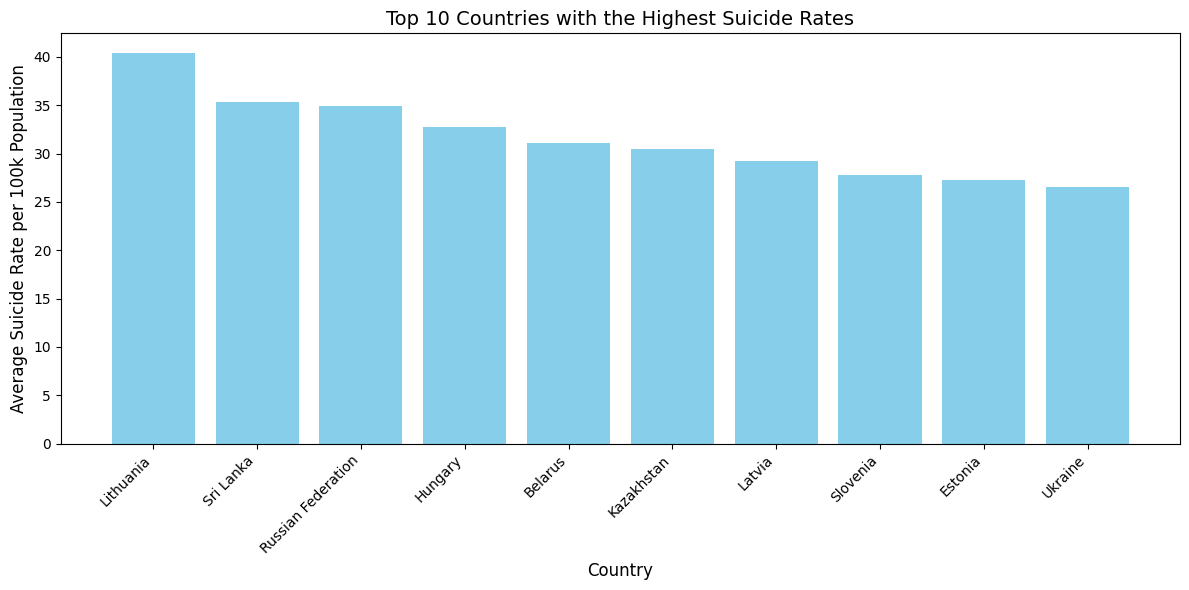

In [ ]:
columns = ['country', 'avg_suicide_rate']
df = pd.DataFrame(data, columns=columns)

# Sort values (optional, as the query already does it)
df = df.sort_values(by='avg_suicide_rate', ascending=False)

# Select the top 10 countries for visualization
top_countries = df.head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries['country'], top_countries['avg_suicide_rate'], color='skyblue')

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Suicide Rate per 100k Population', fontsize=12)
plt.title('Top 10 Countries with the Highest Suicide Rates', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# INSIGHTS -

Range: Countries like Lithuania, Russia, and Belarus have suicide rates between
25 and 35 per 100k population.
● Insights:
1. High rates are linked to economic struggles, alcohol abuse, and lack of
mental health support.
2. Social stigma around mental health makes it harder for people to seek help.


# TOP 10 COUNTRIES WITH THE LOWEST SUICIDE RATES GLOBALLY.

In [40]:
query = """ SELECT country, AVG(suicide_per_100k) AS avg_suicide_rate
FROM suicide_data
GROUP BY country
ORDER BY avg_suicide_rate ASC"""

cur.execute(query)

data = cur.fetchall()

data

[('Dominica', 0.0),
 ('Saint Kitts and Nevis', 0.0),
 ('Jamaica', 0.5217647066011148),
 ('Antigua and Barbuda', 0.5529012400426982),
 ('Oman', 0.7361111156642437),
 ('South Africa', 0.964541667055649),
 ('Kuwait', 1.186433331867059),
 ('Bahamas', 1.2473913120186848),
 ('United Arab Emirates', 1.3179166660540633),
 ('Maldives', 1.367333322763443),
 ('Qatar', 1.7873595567901484),
 ('Bahrain', 1.8541269839283019),
 ('Azerbaijan', 1.8554166661342606),
 ('Grenada', 2.132258064516129),
 ('Turkey', 2.3710714264639785),
 ('Philippines', 2.4212777852184244),
 ('Barbados', 2.9704333265622456),
 ('Guatemala', 3.185277779824618),
 ('Armenia', 3.2758724867497513),
 ('Cyprus', 3.2935955045598275),
 ('Albania', 3.502878782649835),
 ('San Marino', 4.044999917348226),
 ('Greece', 4.064838718102183),
 ('Paraguay', 4.217191363880296),
 ('Georgia', 4.228712135248563),
 ('Bosnia and Herzegovina', 4.6170833346744375),
 ('Mexico', 4.707500018960526),
 ('Malta', 5.032284939160911),
 ('Fiji', 5.105000008236278

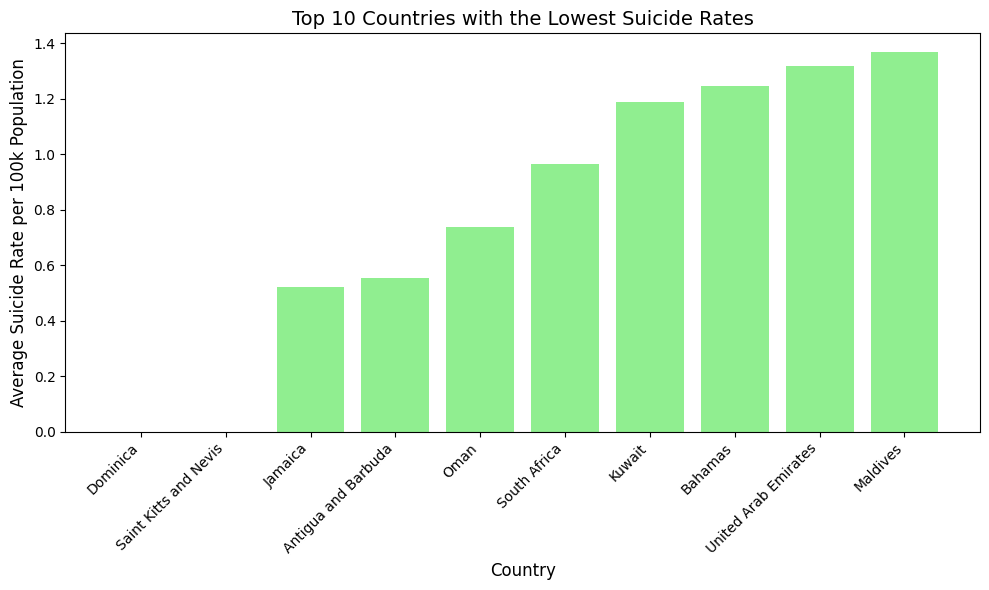

In [8]:

columns = ['country', 'avg_suicide_rate']
df = pd.DataFrame(data, columns=columns)

# Select the top 10 countries with the lowest suicide rates
lowest_countries = df.head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(lowest_countries['country'], lowest_countries['avg_suicide_rate'], color='lightgreen')

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Suicide Rate per 100k Population', fontsize=12)
plt.title('Top 10 Countries with the Lowest Suicide Rates', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


# insights-
Range:
Countries like Dominica, Saint Kitts and Nevis, and Jamaica report suicide rates between
0.3 and 0.5 per 100k population, while nations like UAE, Kuwait, and Maldives range
from 1 to 1.4 per 100k population.
Insights:
1. Cultural and Religious Protection: Strong cultural values and tight-knit
communities contribute to low suicide rates.
2. Economic Stability: High GDP per capita in countries like Kuwait and UAE reduces
stress-related triggers.
3. Underreporting: Stigma around mental health may lead to underreported suicide
rates.

## SUICIDE RATES DIFFERS BY GENDER GLOBALLY-

In [ ]:
query = """SELECT sex, 
       SUM(suicides_no) AS total_suicides,
       (SUM(suicides_no) * 100.0 / (SELECT SUM(suicides_no) FROM suicide_data)) AS percentage
FROM suicide_data
GROUP BY sex """


cur.execute(query)

data =cur.fetchall()

data

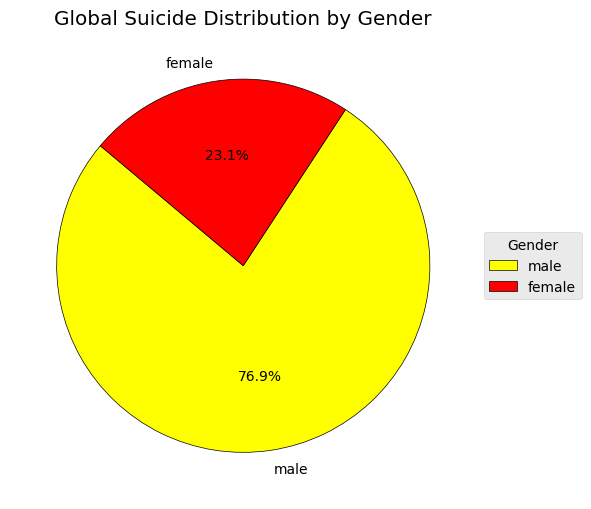

In [38]:

# Data from the query result
data = [('male', 5188910, 76.89074), ('female', 1559510, 23.10926)]

# Separate the data into labels and values
labels = [row[0] for row in data]  # Gender labels
sizes = [row[2] for row in data]  # Percentages

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['yellow', 'red'],
    wedgeprops={'edgecolor': 'black'}
)

# Add a legend
plt.legend(
    wedges,
    labels,
    title="Gender",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Add a title
plt.title('Global Suicide Distribution by Gender')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()




INSIGHTS-
Males: Contribute to approximately 76.9% of global suicides.
Females: Contribute to approximately 23.1% of global suicides.
The global suicide rate for males is 20.24 per 100,000 population, which is significantly higher compared to 5.39 per 100,000 population for females.


# SUICIDE RATES DIFFERS ACROSS AGE-GROUPS

In [17]:
query = """ SELECT age, AVG(suicide_per_100k) AS avg_suicide_rate
FROM suicide_data
GROUP BY age
ORDER BY FIELD(age, '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years')"""

cur.execute(query)
data = cur.fetchall()

data


[('5-14 years', 0.6200412141393523),
 ('15-24 years', 8.947154240470054),
 ('25-34 years', 12.186884959835844),
 ('35-54 years', 14.947440749696364),
 ('55-74 years', 16.15557950249087),
 ('75+ years', 23.955409294601814)]

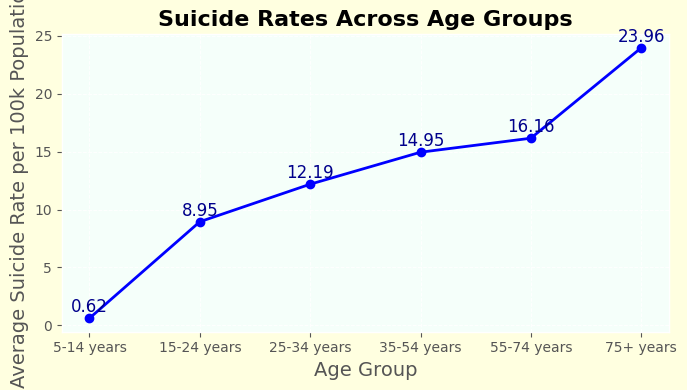

In [37]:

# Data for the visualization
data = [
    ('5-14 years', 0.6200412141393523),
    ('15-24 years', 8.947154240470054),
    ('25-34 years', 12.186884959835844),
    ('35-54 years', 14.947440749696364),
    ('55-74 years', 16.15557950249087),
    ('75+ years', 23.955409294601814)
]

# Convert the data into a DataFrame
columns = ['age', 'avg_suicide_rate']
df = pd.DataFrame(data, columns=columns)


# Create the line graph
plt.figure(figsize=(7, 4), facecolor='lightyellow')
plt.plot(df['age'], df['avg_suicide_rate'], marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels and titles
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Suicide Rate per 100k Population', fontsize=14)
plt.title('Suicide Rates Across Age Groups', fontsize=16, weight='bold')

# Display the data points
for x, y in zip(df['age'], df['avg_suicide_rate']):
    plt.text(x, y + 0.5, f'{y:.2f}', ha='center', fontsize=12, color='darkblue')

# Enhance the grid and background
plt.grid(color='white', linestyle='--', linewidth=0.7)
plt.gca().set_facecolor('mintcream')

# Display the plot
plt.tight_layout()
plt.show()


#  insights -   

Suicide rates increase with age, starting from 0.62 per 100k in the youngest group (5-14 years) and peaking at 23.96 per 100k for the 75+ years group.

The elderly (75+ years) are the most vulnerable, with rates 1.5x higher than the next highest group (55-74 years).

### GLOBAL SUICIDE RATES CHANGES OVER TIME.

In [41]:
query = """SELECT year, AVG(suicide_per_100k) AS avg_suicide_rate
FROM suicide_data
GROUP BY year
ORDER BY year ASC"""

cur.execute(query)
data = cur.fetchall()

data


[(1985, 11.82619788429454),
 (1986, 11.423333335409147),
 (1987, 11.644212947342039),
 (1988, 12.709404772176047),
 (1989, 12.879070551985373),
 (1990, 12.862955754608265),
 (1991, 13.43888017314263),
 (1992, 13.498564079752526),
 (1993, 13.833705122429782),
 (1994, 14.07327207557711),
 (1995, 15.662670955451954),
 (1996, 15.305422088141388),
 (1997, 14.954361447161347),
 (1998, 14.92691980077559),
 (1999, 14.532038148961977),
 (2000, 13.941327519169755),
 (2001, 13.519138236124435),
 (2002, 13.786550386473102),
 (2003, 13.205019379828789),
 (2004, 12.481944449724526),
 (2005, 12.068442437191687),
 (2006, 11.927460803610145),
 (2007, 12.025339149083047),
 (2008, 11.907686285261867),
 (2009, 11.400786515461343),
 (2010, 11.215899633023197),
 (2011, 11.015348808334549),
 (2012, 11.421718081210283),
 (2013, 11.10795832737349),
 (2014, 11.01146369581469),
 (2015, 11.094072595789468),
 (2016, 13.421187466010451)]

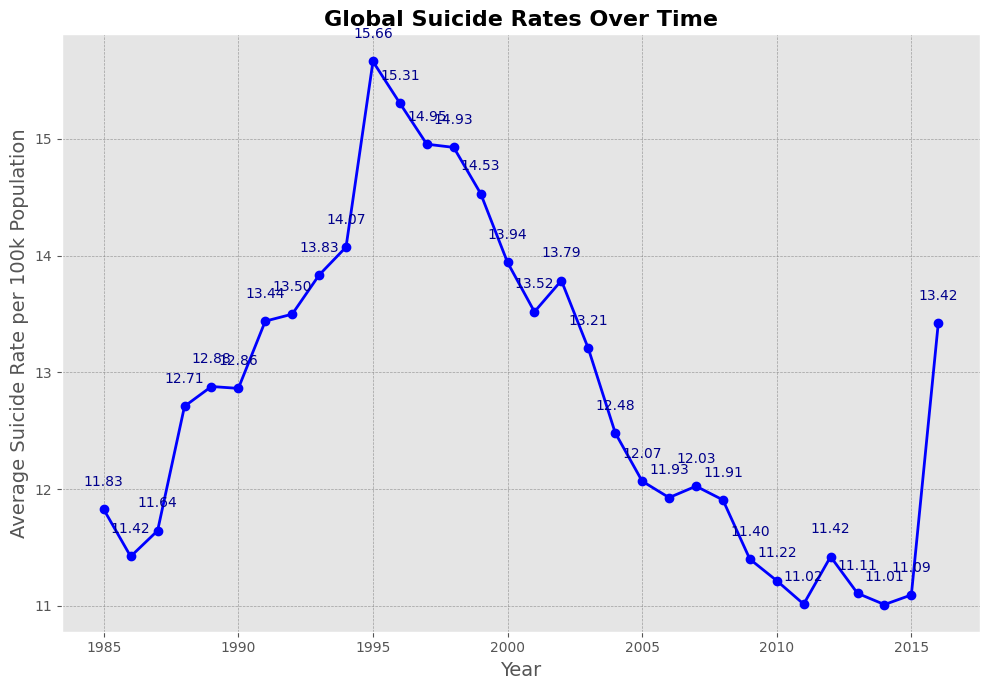

In [47]:

# Data from the query result
data = [
    (1985, 11.82619788429454),
    (1986, 11.423333335409147),
    (1987, 11.644212947342039),
    (1988, 12.709404772176047),
    (1989, 12.879070551985373),
    (1990, 12.862955754608265),
    (1991, 13.43888017314263),
    (1992, 13.498564079752526),
    (1993, 13.833705122429782),
    (1994, 14.07327207557711),
    (1995, 15.662670955451954),
    (1996, 15.305422088141388),
    (1997, 14.954361447161347),
    (1998, 14.92691980077559),
    (1999, 14.532038148961977),
    (2000, 13.941327519169755),
    (2001, 13.519138236124435),
    (2002, 13.786550386473102),
    (2003, 13.205019379828789),
    (2004, 12.481944449724526),
    (2005, 12.068442437191687),
    (2006, 11.927460803610145),
    (2007, 12.025339149083047),
    (2008, 11.907686285261867),
    (2009, 11.400786515461343),
    (2010, 11.215899633023197),
    (2011, 11.015348808334549),
    (2012, 11.421718081210283),
    (2013, 11.10795832737349),
    (2014, 11.01146369581469),
    (2015, 11.094072595789468),
    (2016, 13.421187466010451)
]

# Convert the data to a pandas DataFrame
columns = ['year', 'avg_suicide_rate']
df = pd.DataFrame(data, columns=columns)

# Create the line chart
plt.figure(figsize=(10, 7))
plt.plot(df['year'], df['avg_suicide_rate'], marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Suicide Rate per 100k Population', fontsize=14)
plt.title('Global Suicide Rates Over Time', fontsize=16, weight='bold')

# Highlight data points with values
for x, y in zip(df['year'], df['avg_suicide_rate']):
    plt.text(x, y + 0.2, f'{y:.2f}', ha='center', fontsize=10, color='darkblue')

# Add gridlines for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


INSIGHTS-

1. Global suicide rates increased steadily from **1985 (11.83)** to a peak in **1995 (15.66)** due to societal and economic stressors.
2. A consistent decline occurred from **1996 to 2014 (11.01)**, reflecting improved mental health awareness and interventions.
3. The sudden spike in **2016 (13.42)** indicates emerging stressors or changes in reporting, warranting further investigation.

# GENERATION WISE SUICIDE RATE (OVERALL DISTRIBUTION)-

In [49]:
query = """SELECT generation, 
       SUM(suicides_no) AS total_suicides,
       (SUM(suicides_no) * 100.0 / (SELECT SUM(suicides_no) FROM suicide_data)) AS percentage
FROM suicide_data
GROUP BY generation
ORDER BY percentage DESC"""

cur.execute(query)

data = cur.fetchall()

data


[('Boomers', Decimal('2284498'), Decimal('33.85234')),
 ('Silent', Decimal('1781744'), Decimal('26.40239')),
 ('Generation X', Decimal('1532804'), Decimal('22.71352')),
 ('Millenials', Decimal('623459'), Decimal('9.23859')),
 ('G.I. Generation', Decimal('510009'), Decimal('7.55746')),
 ('Generation Z', Decimal('15906'), Decimal('0.23570'))]

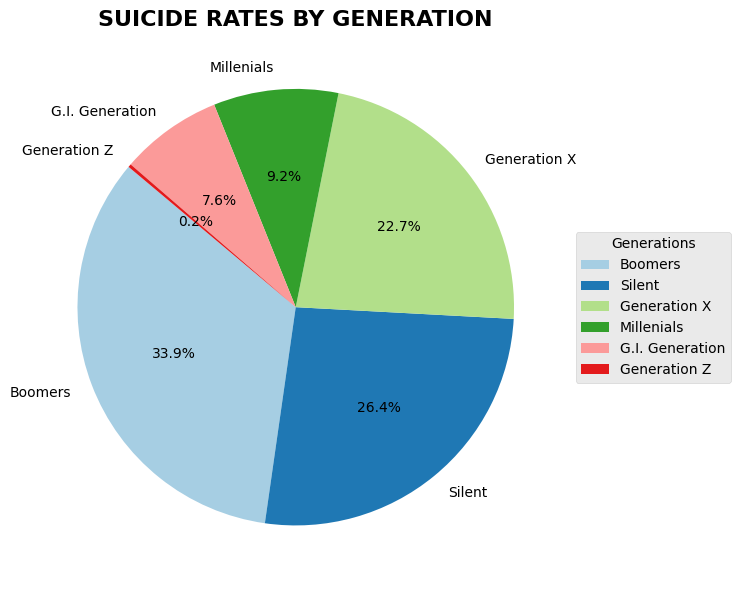

In [54]:
# Data returned by the SQL query
data = [
    ('Boomers', 2284498, 33.85234),
    ('Silent', 1781744, 26.40239),
    ('Generation X', 1532804, 22.71352),
    ('Millenials', 623459, 9.23859),
    ('G.I. Generation', 510009, 7.55746),
    ('Generation Z', 15906, 0.23570)
]

# Convert the data to a pandas DataFrame
columns = ['generation', 'total_suicides', 'percentage']
df = pd.DataFrame(data, columns=columns)

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    df['percentage'], 
    labels=df['generation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

# Add a title in uppercase and bold
plt.title('SUICIDE RATES BY GENERATION', fontsize=16, weight='bold')

# Add a legend
plt.legend(
    wedges, 
    df['generation'], 
    title="Generations", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

# Show the plot
plt.tight_layout()
plt.show()


### **Insights from the Pie Chart (Summary):**
Boomers (33.9%) and the Silent Generation (26.4%) contribute the highest proportion of suicides, likely due to age-related challenges like isolation and health issues. Generation X follows with 22.7%, while Millennials (9.2%) and the G.I. Generation (7.6%) show declining contributions. Generation Z has the lowest share (0.2%), reflecting the youngest and least affected demographic.

###**"Global Distribution of Average Suicide Rates: Frequency Across Ranges"**

In [70]:
query = """SELECT country, AVG(suicide_per_100k) AS avg_suicide_rate
FROM suicide_data
GROUP BY country
ORDER BY avg_suicide_rate DESC"""

cur.execute(query)

data = cur.fetchall()

data

[('Lithuania', 40.415572320686955),
 ('Sri Lanka', 35.29515142964594),
 ('Russian Federation', 34.89237662496758),
 ('Hungary', 32.76151602821004),
 ('Belarus', 31.075912612652967),
 ('Kazakhstan', 30.511282123529757),
 ('Latvia', 29.259325360731474),
 ('Slovenia', 27.827857180720283),
 ('Estonia', 27.276904721108693),
 ('Ukraine', 26.58232144133321),
 ('Republic of Korea', 25.135618347113812),
 ('Austria', 23.759764376735188),
 ('Croatia', 22.83526719389981),
 ('Finland', 22.770430997956073),
 ('Guyana', 22.186399995883306),
 ('Serbia', 22.164120290152454),
 ('France', 21.67569438309098),
 ('Japan', 21.57319887551249),
 ('Suriname', 21.31642851410877),
 ('Belgium', 21.237903263980662),
 ('Cuba', 21.22204866951021),
 ('Bulgaria', 19.489111133830416),
 ('Uruguay', 19.461190503888897),
 ('Switzerland', 19.024087325152422),
 ('Czech Republic', 18.48754649956404),
 ('Mongolia', 18.438999885320662),
 ('Singapore', 17.045645190663237),
 ('Luxembourg', 16.549892411437085),
 ('Germany', 15.559

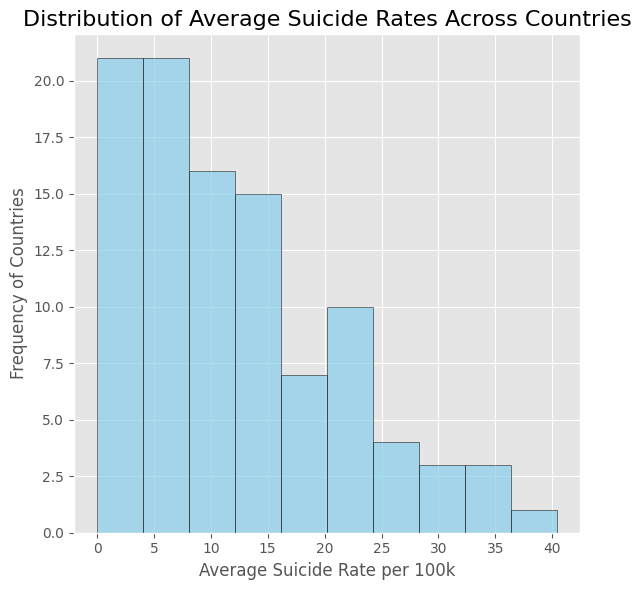

In [73]:
import matplotlib.pyplot as plt

# Data: List of tuples with country names and average suicide rates
data =[('Lithuania', 40.415572320686955),
 ('Sri Lanka', 35.29515142964594),
 ('Russian Federation', 34.89237662496758),
 ('Hungary', 32.76151602821004),
 ('Belarus', 31.075912612652967),
 ('Kazakhstan', 30.511282123529757),
 ('Latvia', 29.259325360731474),
 ('Slovenia', 27.827857180720283),
 ('Estonia', 27.276904721108693),
 ('Ukraine', 26.58232144133321),
 ('Republic of Korea', 25.135618347113812),
 ('Austria', 23.759764376735188),
 ('Croatia', 22.83526719389981),
 ('Finland', 22.770430997956073),
 ('Guyana', 22.186399995883306),
 ('Serbia', 22.164120290152454),
 ('France', 21.67569438309098),
 ('Japan', 21.57319887551249),
 ('Suriname', 21.31642851410877),
 ('Belgium', 21.237903263980662),
 ('Cuba', 21.22204866951021),
 ('Bulgaria', 19.489111133830416),
 ('Uruguay', 19.461190503888897),
 ('Switzerland', 19.024087325152422),
 ('Czech Republic', 18.48754649956404),
 ('Mongolia', 18.438999885320662),
 ('Singapore', 17.045645190663237),
 ('Luxembourg', 16.549892411437085),
 ('Germany', 15.559903883088667),
 ('Poland', 15.269513879411129),
 ('Sweden', 14.658435757308366),
 ('New Zealand', 14.39172411401724),
 ('Macau', 14.3116668065389),
 ('Kyrgyzstan', 14.28621797836744),
 ('Denmark', 14.09715908901258),
 ('Trinidad and Tobago', 13.82564810562281),
 ('United States', 13.819811860640202),
 ('Australia', 12.99280556626618),
 ('Norway', 12.940999967273738),
 ('Iceland', 12.800366474071723),
 ('Slovakia', 12.568787900222974),
 ('Romania', 12.489670654123058),
 ('Canada', 12.467586173793707),
 ('Mauritius', 11.687382229647712),
 ('Portugal', 11.337530845017344),
 ('Cabo Verde', 11.153333445390066),
 ('Ireland', 10.782583309958378),
 ('Netherlands', 10.645340325320579),
 ('Chile', 10.542043001280836),
 ('El Salvador', 10.541458366697448),
 ('Argentina', 10.469327941817301),
 ('Puerto Rico', 10.186236552493547),
 ('Montenegro', 9.95025009115537),
 ('Aruba', 9.503095237981706),
 ('Spain', 9.43295702049809),
 ('Israel', 8.951532268315875),
 ('Turkmenistan', 8.605545982889746),
 ('Italy', 8.518467755557628),
 ('Uzbekistan', 8.099128797057677),
 ('United Kingdom', 7.502473107123527),
 ('Seychelles', 7.480092560803449),
 ('Saint Lucia', 7.202738099154972),
 ('Costa Rica', 7.093666657515698),
 ('Thailand', 7.0738622877902975),
 ('Kiribati', 6.65537877516313),
 ('Nicaragua', 6.566944470836057),
 ('Ecuador', 6.304327957171907),
 ('Belize', 6.230624987965538),
 ('Brazil', 5.8460215288464745),
 ('Panama', 5.81353332956632),
 ('Saint Vincent and Grenadines', 5.755433378219604),
 ('Colombia', 5.401586025392496),
 ('Fiji', 5.105000008236278),
 ('Malta', 5.032284939160911),
 ('Mexico', 4.707500018960526),
 ('Bosnia and Herzegovina', 4.6170833346744375),
 ('Georgia', 4.228712135248563),
 ('Paraguay', 4.217191363880296),
 ('Greece', 4.064838718102183),
 ('San Marino', 4.044999917348226),
 ('Albania', 3.502878782649835),
 ('Cyprus', 3.2935955045598275),
 ('Armenia', 3.2758724867497513),
 ('Guatemala', 3.185277779824618),
 ('Barbados', 2.9704333265622456),
 ('Philippines', 2.4212777852184244),
 ('Turkey', 2.3710714264639785),
 ('Grenada', 2.132258064516129),
 ('Azerbaijan', 1.8554166661342606),
 ('Bahrain', 1.8541269839283019),
 ('Qatar', 1.7873595567901484),
 ('Maldives', 1.367333322763443),
 ('United Arab Emirates', 1.3179166660540633),
 ('Bahamas', 1.2473913120186848),
 ('Kuwait', 1.186433331867059),
 ('South Africa', 0.964541667055649),
 ('Oman', 0.7361111156642437),
 ('Antigua and Barbuda', 0.5529012400426982),
 ('Jamaica', 0.5217647066011148),
 ('Dominica', 0.0),
 ('Saint Kitts and Nevis', 0.0)]

# Extract the suicide rates from the data
suicide_rates = [rate for _, rate in data]

# Create the histogram
plt.figure(figsize=(6, 6))
plt.hist(suicide_rates, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Average Suicide Rates Across Countries', fontsize=16)
plt.xlabel('Average Suicide Rate per 100k', fontsize=12)
plt.ylabel('Frequency of Countries', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


 ### INSIGHT-
 The histogram shows that **most countries have average suicide rates concentrated in the lower ranges**, with **42 countries falling in the 0–8 range per 100k people**. **As the suicide rates increase, the frequency of countries significantly decreases**, with only **7 countries having rates between 16–20 per 100k**.

#  "RELATIONSHIP BETWEEN GDP PER CAPITA AND SUICIDE RATES-

In [77]:
query = """WITH GDP_Ranges AS (
    SELECT 
        *,
        CASE
            WHEN gdp_per_capita BETWEEN 250 AND 500 THEN '250-500'
            WHEN gdp_per_capita BETWEEN 501 AND 1000 THEN '501-1000'
            WHEN gdp_per_capita BETWEEN 1001 AND 1500 THEN '1001-1500'
            WHEN gdp_per_capita BETWEEN 1501 AND 2000 THEN '1501-2000'
            WHEN gdp_per_capita BETWEEN 2001 AND 2500 THEN '2001-2500'
            WHEN gdp_per_capita > 2500 THEN '>2500'
            ELSE 'Unknown'
        END AS GDP_Range
    FROM suicide_data
),
GDP_Average AS (
    SELECT 
        GDP_Range,
        AVG(suicide_per_100k) AS Avg_Suicides
    FROM GDP_Ranges
    GROUP BY GDP_Range
),
Overall_Average AS (
    SELECT 
        AVG(suicide_per_100k) AS Overall_Avg
    FROM suicide_data
)
SELECT 
    g.GDP_Range,
    g.Avg_Suicides,
    o.Overall_Avg
FROM GDP_Average g
CROSS JOIN Overall_Average o
ORDER BY g.GDP_Range """

cur.execute(query)

data = cur.fetchall()
data


[('>2500', 12.87463325226368, 12.816097409101264),
 ('1001-1500', 14.192109378979593, 12.816097409101264),
 ('1501-2000', 13.184523812847004, 12.816097409101264),
 ('2001-2500', 12.147228694914357, 12.816097409101264),
 ('250-500', 12.414400005837281, 12.816097409101264),
 ('501-1000', 10.850237010690506, 12.816097409101264)]

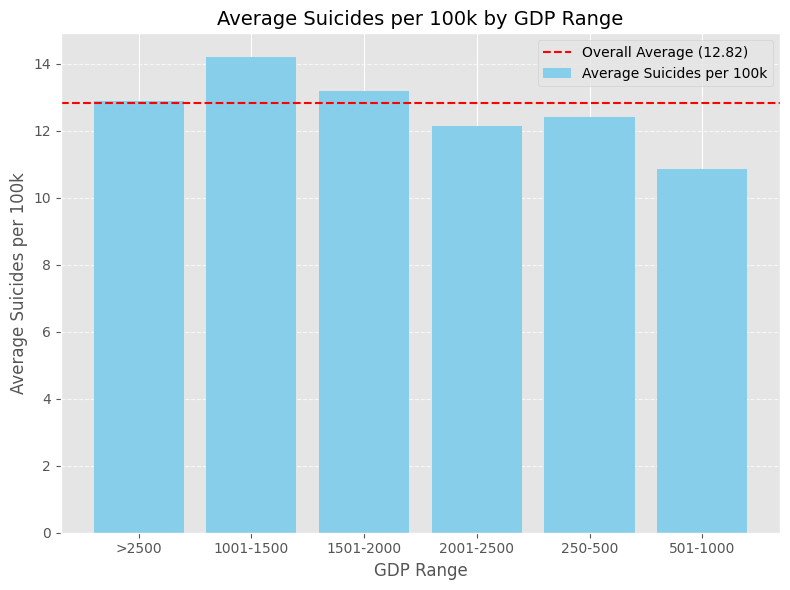

In [79]:

# Data from the SQL query
output = [
    ('>2500', 12.87463325226368, 12.816097409101264),
    ('1001-1500', 14.192109378979593, 12.816097409101264),
    ('1501-2000', 13.184523812847004, 12.816097409101264),
    ('2001-2500', 12.147228694914357, 12.816097409101264),
    ('250-500', 12.414400005837281, 12.816097409101264),
    ('501-1000', 10.850237010690506, 12.816097409101264)
]

# Extracting data for visualization
gdp_ranges = [item[0] for item in output]
avg_suicides = [item[1] for item in output]
overall_avg = output[0][2]  # Overall average is the same for all rows

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(gdp_ranges, avg_suicides, color='skyblue', label='Average Suicides per 100k')

# Add a horizontal line for the overall average
plt.axhline(y=overall_avg, color='red', linestyle='--', label=f'Overall Average ({overall_avg:.2f})')

# Customize the plot
plt.title('Average Suicides per 100k by GDP Range', fontsize=14)
plt.xlabel('GDP Range', fontsize=12)
plt.ylabel('Average Suicides per 100k', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# INSIGHTS-
The visualization shows that suicide rates don't follow a simple "higher GDP = lower suicide rate" pattern. While lower GDP ranges (250-1000) have relatively lower suicide rates, middle GDP ranges (1001-2000) exhibit higher rates, possibly due to economic transitions and associated stress. Higher GDP ranges (>2500) show a slight decrease in suicide rates, potentially reflecting better mental health resources and living conditions. This suggests that factors beyond GDP, like healthcare, culture, and societal support, play a critical role.

In [84]:
query= """SELECT 
    CASE 
        WHEN gdp_per_capita < 500 THEN '<500'
        WHEN gdp_per_capita BETWEEN 500 AND 1000 THEN '501-1000'
        WHEN gdp_per_capita BETWEEN 1001 AND 1500 THEN '1001-1500'
        WHEN gdp_per_capita BETWEEN 1501 AND 2000 THEN '1501-2000'
        WHEN gdp_per_capita BETWEEN 2001 AND 2500 THEN '2001-2500'
        ELSE '>2500'
    END AS gdp_range,
    CASE 
        WHEN population < 1000000 THEN '<1M'
        WHEN population BETWEEN 1000000 AND 10000000 THEN '1M-10M'
        WHEN population BETWEEN 10000001 AND 50000000 THEN '10M-50M'
        WHEN population BETWEEN 50000001 AND 100000000 THEN '50M-100M'
        ELSE '>100M'
    END AS population_range,
    AVG(suicide_per_100k) AS avg_suicide_rate
FROM 
    suicide_data
GROUP BY 
    gdp_range, population_range
ORDER BY 
    gdp_range, population_range"""

cur.execute(query)

data = cur.fetchall()

data


[('<500', '<1M', 11.08899256731592),
 ('<500', '1M-10M', 23.514687303453684),
 ('>2500', '<1M', 12.975135037456202),
 ('>2500', '10M-50M', 14.399787465540792),
 ('>2500', '1M-10M', 12.369265938824517),
 ('1001-1500', '<1M', 14.15496775600218),
 ('1001-1500', '10M-50M', 34.63909092139114),
 ('1001-1500', '1M-10M', 13.656229490566938),
 ('1501-2000', '<1M', 12.192459906645636),
 ('1501-2000', '10M-50M', 24.989666650692623),
 ('1501-2000', '1M-10M', 13.989315341276994),
 ('2001-2500', '<1M', 12.984357563206437),
 ('2001-2500', '10M-50M', 13.575312353204936),
 ('2001-2500', '1M-10M', 9.875809868286089),
 ('501-1000', '<1M', 9.19751992378666),
 ('501-1000', '1M-10M', 16.308552652965055)]

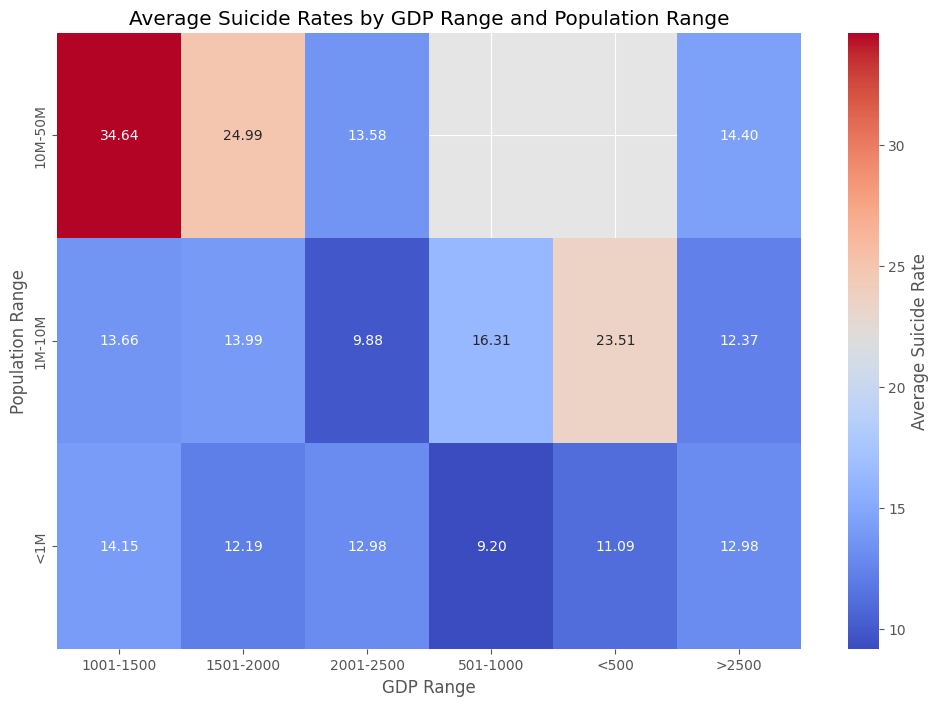

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SQL query output data
data = [
    ('<500', '<1M', 11.08899256731592),
    ('<500', '1M-10M', 23.514687303453684),
    ('>2500', '<1M', 12.975135037456202),
    ('>2500', '10M-50M', 14.399787465540792),
    ('>2500', '1M-10M', 12.369265938824517),
    ('1001-1500', '<1M', 14.15496775600218),
    ('1001-1500', '10M-50M', 34.63909092139114),
    ('1001-1500', '1M-10M', 13.656229490566938),
    ('1501-2000', '<1M', 12.192459906645636),
    ('1501-2000', '10M-50M', 24.989666650692623),
    ('1501-2000', '1M-10M', 13.989315341276994),
    ('2001-2500', '<1M', 12.984357563206437),
    ('2001-2500', '10M-50M', 13.575312353204936),
    ('2001-2500', '1M-10M', 9.875809868286089),
    ('501-1000', '<1M', 9.19751992378666),
    ('501-1000', '1M-10M', 16.308552652965055)
]

# Column names for the DataFrame
columns = ['gdp_range', 'population_range', 'avg_suicide_rate']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Pivot the DataFrame for heatmap
heatmap_data = df.pivot(index='population_range', columns='gdp_range', values='avg_suicide_rate')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Suicide Rate'})
plt.title("Average Suicide Rates by GDP Range and Population Range")
plt.ylabel("Population Range")
plt.xlabel("GDP Range")
plt.show()


#INSIGHTS-


Countries with mid-range GDP per capita and populations between 10M-50M show the highest average suicide rates, likely due to economic transitions. In contrast, low-GDP countries with smaller populations exhibit lower suicide rates, possibly due to cultural resilience. High-GDP nations have stable suicide rates, with mid-sized populations showing slight increases, highlighting the complex interplay of socio-economic factors.

#  Key Conclusions:
1. Suicide rates are highest in countries with mid-range GDP, likely due to
economic transitions and stress.
2. Men are disproportionately affected, making up about 77% of suicides,
highlighting gender-specific challenges.
3. Older age groups, like the Silent Generation, show higher suicide rates due to
health and social factors.
4. Smaller populations with strong community support tend to have lower suicide
rates.
5. Economic instability during global crises increases suicide rates, emphasizing
the need for robust support systems.
6. Improved mental health policies and targeted interventions for high-risk
groups are crucial to addressing this issue